In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("m1gb.csv")

In [3]:
df

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Zimbabwe,Unemployment rate by sex and age,Female,25+,Adults,4.262,4.586,4.773,4.900,5.027,5.309,6.345,7.792,7.704,7.597,7.528
1130,Zimbabwe,Unemployment rate by sex and age,Female,Under 15,Children,5.174,5.666,6.014,6.289,6.555,6.990,8.494,9.853,9.670,9.518,9.414
1131,Zimbabwe,Unemployment rate by sex and age,Male,15-24,Youth,6.007,7.131,8.119,9.029,9.927,11.048,13.191,14.261,13.966,13.675,13.485
1132,Zimbabwe,Unemployment rate by sex and age,Male,25+,Adults,3.677,4.325,4.843,5.287,5.722,6.362,6.996,7.234,6.858,6.757,6.703


In [4]:
df.head()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [5]:
model1=LabelEncoder()
model2=StandardScaler()

In [6]:
df=df.apply(lambda x:model1.fit_transform(x) if x.dtype=="O" else x)

In [7]:
df

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,0,0,0,2,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,0,0,0,1,0,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,0,0,0,2,1,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,0,0,1,0,2,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,0,0,1,1,0,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,188,0,0,1,0,4.262,4.586,4.773,4.900,5.027,5.309,6.345,7.792,7.704,7.597,7.528
1130,188,0,0,2,1,5.174,5.666,6.014,6.289,6.555,6.990,8.494,9.853,9.670,9.518,9.414
1131,188,0,1,0,2,6.007,7.131,8.119,9.029,9.927,11.048,13.191,14.261,13.966,13.675,13.485
1132,188,0,1,1,0,3.677,4.325,4.843,5.287,5.722,6.362,6.996,7.234,6.858,6.757,6.703


In [8]:
df.isna().sum()

country_name       0
indicator_name     0
sex                0
age_group          0
age_categories     0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               6
2023              12
2024              12
dtype: int64

In [9]:
df.loc[df["2024"].isna()]

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
756,128,0,0,0,2,51.653,56.179,60.753,66.914,69.188,66.831,69.503,64.249,56.709,NaN,NaN
757,128,0,0,1,0,20.681,28.478,31.496,35.803,35.161,35.022,33.515,37.921,36.385,NaN,NaN
758,128,0,0,2,1,26.084,34.121,37.727,42.521,41.621,40.891,39.812,42.551,40.045,NaN,NaN
759,128,0,1,0,2,33.669,33.242,33.696,36.220,36.698,34.448,36.227,36.866,31.563,NaN,NaN
760,128,0,1,1,0,14.085,15.385,15.868,16.334,17.476,17.043,18.443,17.955,16.772,NaN,NaN
761,128,0,1,2,1,19.144,20.083,20.448,21.375,22.271,21.195,22.335,22.224,20.186,NaN,NaN
1056,176,0,0,0,2,22.811,22.116,21.759,16.976,19.305,15.365,18.539,20.412,NaN,NaN,NaN
1057,176,0,0,1,0,6.292,6.990,6.669,7.069,6.615,7.345,8.508,9.519,NaN,NaN,NaN
1058,176,0,0,2,1,7.568,8.105,7.729,7.735,7.442,7.856,9.077,10.143,NaN,NaN,NaN
1059,176,0,1,0,2,24.177,22.940,24.103,20.388,16.926,15.486,19.900,18.085,NaN,NaN,NaN


In [10]:
scaler=model2.fit_transform(df)

In [11]:
scaler

array([[-1.72291063,  0.        , -1.        , ...,  1.97077279,
         2.22519218,  2.3455088 ],
       [-1.72291063,  0.        , -1.        , ...,  1.3135769 ,
         1.62338874,  1.84074921],
       [-1.72291063,  0.        , -1.        , ...,  1.59894981,
         1.92398996,  2.10726708],
       ...,
       [ 1.72291063,  0.        ,  1.        , ...,  0.35336722,
         0.36959817,  0.3554485 ],
       [ 1.72291063,  0.        ,  1.        , ..., -0.33940282,
        -0.32335726, -0.32458319],
       [ 1.72291063,  0.        ,  1.        , ..., -0.14603538,
        -0.12743057, -0.1311622 ]])

In [12]:
train=pd.DataFrame(scaler,columns=df.columns)

In [13]:
train.head()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,-1.722911,0.0,-1.0,-1.224745,1.224745,0.175651,0.430895,0.693508,0.965890,0.962879,0.956199,0.835221,0.940079,1.970773,2.225192,2.345509
1,-1.722911,0.0,-1.0,0.000000,-1.224745,-0.252994,-0.206985,-0.154585,-0.088707,0.067138,0.221068,0.198431,0.275321,1.313577,1.623389,1.840749
2,-1.722911,0.0,-1.0,1.224745,0.000000,-0.097336,0.025621,0.155150,0.296484,0.398123,0.496099,0.439287,0.525491,1.598950,1.923990,2.107267
3,-1.722911,0.0,1.0,-1.224745,1.224745,-0.196309,0.021039,0.246693,0.485459,0.444972,0.393412,0.231656,0.338254,0.615446,0.854106,0.985646
4,-1.722911,0.0,1.0,0.000000,-1.224745,-0.443113,-0.402657,-0.355922,-0.294794,-0.255010,-0.228345,-0.277847,-0.204593,0.099085,0.234573,0.315541


In [14]:
corr_matrix=abs(train.cov())

In [15]:
corr_matrix

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
country_name,1.000883e+00,0.0,2.351752e-18,3.919587e-18,3.923214e-18,0.027276,0.028635,0.022173,0.013195,0.019207,0.008600,0.019828,0.006120,0.011307,0.015785,0.016513
indicator_name,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sex,2.351752e-18,0.0,1.000883e+00,1.763814e-18,2.937585e-18,0.100854,0.104650,0.108908,0.116080,0.113231,0.119260,0.116302,0.118282,0.122898,0.115554,0.118227
age_group,3.919587e-18,0.0,1.763814e-18,1.000883e+00,5.004413e-01,0.378293,0.379919,0.382518,0.379649,0.376129,0.375913,0.402373,0.390141,0.379396,0.380216,0.381176
age_categories,3.923214e-18,0.0,2.937585e-18,5.004413e-01,1.000883e+00,0.445201,0.446623,0.449119,0.444716,0.439390,0.438513,0.466412,0.451467,0.438967,0.439889,0.440569
2014,2.727597e-02,0.0,1.008537e-01,3.782926e-01,4.452009e-01,1.000883,0.991988,0.977132,0.955938,0.936580,0.914483,0.898979,0.900379,0.886054,0.870576,0.866216
2015,2.863483e-02,0.0,1.046500e-01,3.799185e-01,4.466228e-01,0.991988,1.000883,0.989533,0.972706,0.955809,0.935922,0.919062,0.921101,0.908035,0.888025,0.883853
2016,2.217275e-02,0.0,1.089079e-01,3.825181e-01,4.491190e-01,0.977132,0.989533,1.000883,0.987944,0.974660,0.960011,0.943890,0.946160,0.934272,0.909824,0.906034
2017,1.319465e-02,0.0,1.160804e-01,3.796491e-01,4.447163e-01,0.955938,0.972706,0.987944,1.000883,0.992319,0.980688,0.962574,0.962446,0.954076,0.926564,0.923706
2018,1.920653e-02,0.0,1.132310e-01,3.761292e-01,4.393905e-01,0.936580,0.955809,0.974660,0.992319,1.000883,0.991549,0.974333,0.974101,0.966263,0.938341,0.935504


In [16]:
j=(train.cov())

In [17]:
j

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
country_name,1.000883e+00,0.0,2.351752e-18,3.919587e-18,3.923214e-18,-0.027276,-0.028635,-0.022173,-0.013195,-0.019207,-0.008600,-0.019828,-0.006120,-0.011307,-0.015785,-0.016513
indicator_name,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sex,2.351752e-18,0.0,1.000883e+00,1.763814e-18,-2.937585e-18,-0.100854,-0.104650,-0.108908,-0.116080,-0.113231,-0.119260,-0.116302,-0.118282,-0.122898,-0.115554,-0.118227
age_group,3.919587e-18,0.0,1.763814e-18,1.000883e+00,-5.004413e-01,-0.378293,-0.379919,-0.382518,-0.379649,-0.376129,-0.375913,-0.402373,-0.390141,-0.379396,-0.380216,-0.381176
age_categories,3.923214e-18,0.0,-2.937585e-18,-5.004413e-01,1.000883e+00,0.445201,0.446623,0.449119,0.444716,0.439390,0.438513,0.466412,0.451467,0.438967,0.439889,0.440569
2014,-2.727597e-02,0.0,-1.008537e-01,-3.782926e-01,4.452009e-01,1.000883,0.991988,0.977132,0.955938,0.936580,0.914483,0.898979,0.900379,0.886054,0.870576,0.866216
2015,-2.863483e-02,0.0,-1.046500e-01,-3.799185e-01,4.466228e-01,0.991988,1.000883,0.989533,0.972706,0.955809,0.935922,0.919062,0.921101,0.908035,0.888025,0.883853
2016,-2.217275e-02,0.0,-1.089079e-01,-3.825181e-01,4.491190e-01,0.977132,0.989533,1.000883,0.987944,0.974660,0.960011,0.943890,0.946160,0.934272,0.909824,0.906034
2017,-1.319465e-02,0.0,-1.160804e-01,-3.796491e-01,4.447163e-01,0.955938,0.972706,0.987944,1.000883,0.992319,0.980688,0.962574,0.962446,0.954076,0.926564,0.923706
2018,-1.920653e-02,0.0,-1.132310e-01,-3.761292e-01,4.393905e-01,0.936580,0.955809,0.974660,0.992319,1.000883,0.991549,0.974333,0.974101,0.966263,0.938341,0.935504


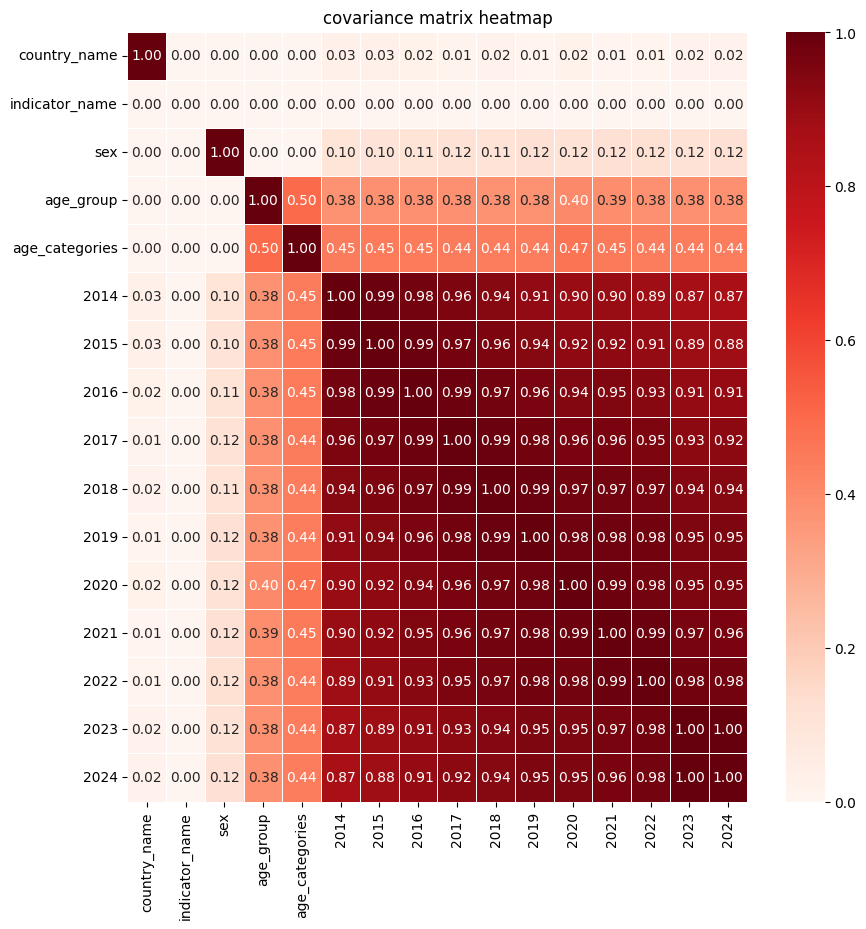

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="Reds",annot=True,fmt=".2f",linewidth=0.5)
plt.title("covariance matrix heatmap")
plt.show()

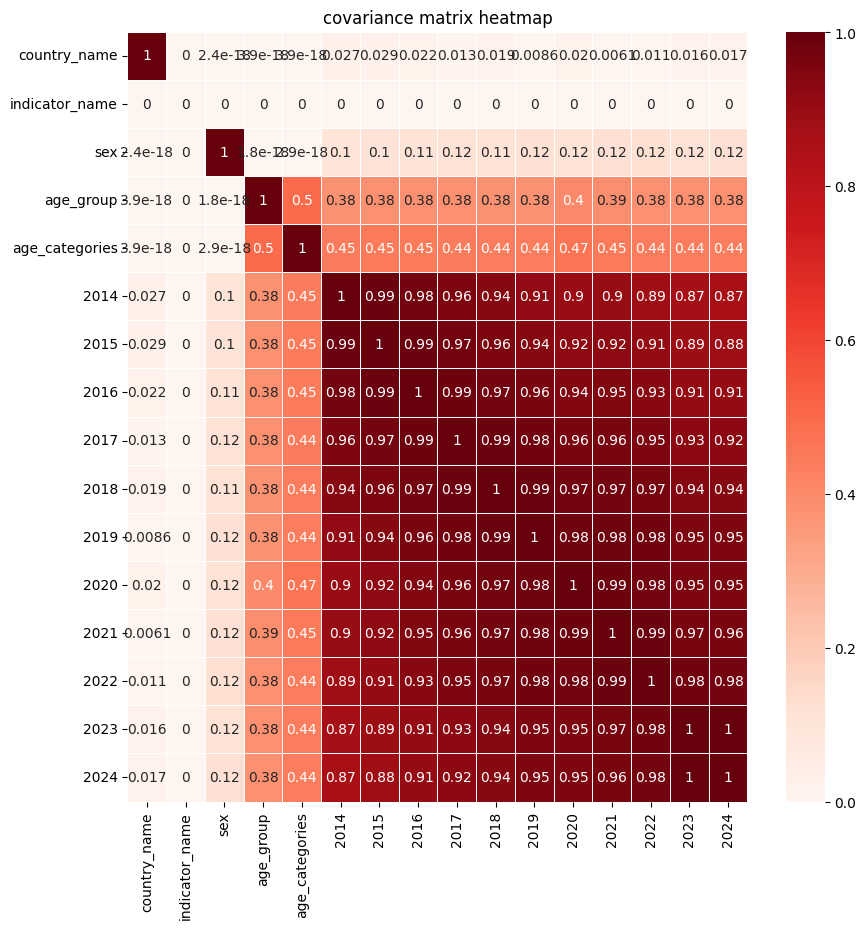

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="Reds",annot=True,linewidth=0.5)
plt.title("covariance matrix heatmap")
plt.show()

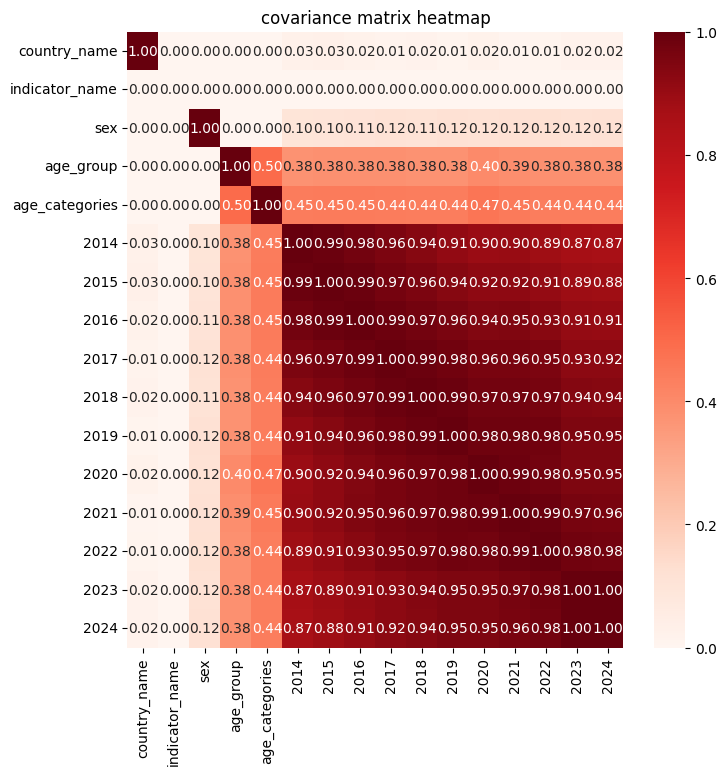

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,cmap="Reds",annot=True,fmt=".2f")
plt.title("covariance matrix heatmap")
plt.show()

In [21]:
df.head()

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,0,0,0,2,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,0,0,0,1,0,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,0,0,0,2,1,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,0,0,1,0,2,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,0,0,1,1,0,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [22]:
df=df.dropna(subset=["2024"],inplace=False)

In [23]:
df

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,0,0,0,2,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,0,0,0,1,0,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,0,0,0,2,1,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,0,0,1,0,2,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,0,0,1,1,0,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,188,0,0,1,0,4.262,4.586,4.773,4.900,5.027,5.309,6.345,7.792,7.704,7.597,7.528
1130,188,0,0,2,1,5.174,5.666,6.014,6.289,6.555,6.990,8.494,9.853,9.670,9.518,9.414
1131,188,0,1,0,2,6.007,7.131,8.119,9.029,9.927,11.048,13.191,14.261,13.966,13.675,13.485
1132,188,0,1,1,0,3.677,4.325,4.843,5.287,5.722,6.362,6.996,7.234,6.858,6.757,6.703


In [24]:
df=df.drop(["indicator_name"],axis=1)

In [25]:
df.head()

,country_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,0,0,2,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,0,0,1,0,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,0,0,2,1,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,0,1,0,2,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,0,1,1,0,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [26]:
df.isna().sum()

country_name      0
sex               0
age_group         0
age_categories    0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
2024              0
dtype: int64

In [27]:
df.head()

,country_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,0,0,0,2,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,0,0,1,0,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,0,0,2,1,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,0,1,0,2,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,0,1,1,0,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [28]:
X_train=df.drop(["2024"],axis=1)

In [29]:
y_train=df["2024"].values

In [30]:
print(X_train)

      country_name  sex  age_group  age_categories    2014    2015    2016  \
0                0    0          0               2  13.340  15.974  18.570   
1                0    0          1               0   8.576   9.014   9.463   
2                0    0          2               1  10.306  11.552  12.789   
3                0    1          0               2   9.206  11.502  13.772   
4                0    1          1               0   6.463   6.879   7.301   
...            ...  ...        ...             ...     ...     ...     ...   
1129           188    0          1               0   4.262   4.586   4.773   
1130           188    0          2               1   5.174   5.666   6.014   
1131           188    1          0               2   6.007   7.131   8.119   
1132           188    1          1               0   3.677   4.325   4.843   
1133           188    1          2               1   4.355   5.152   5.821   

        2017    2018    2019    2020    2021    2022    2023  


In [31]:
print(y_train)

[33.332 28.298 30.956 ... 13.485  6.703  8.632]


In [32]:
X_train=pd.DataFrame(model2.fit_transform(X_train,),columns=X_train.columns)

In [33]:
X_train

,country_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,-1.714622,-1.0,-1.224745,1.224745,0.185376,0.445456,0.714500,0.996801,0.996080,0.987623,0.859486,0.968082,2.014577,2.225192
1,-1.714622,-1.0,0.000000,-1.224745,-0.245378,-0.197959,-0.144130,-0.076423,0.082789,0.238784,0.213563,0.293022,1.346883,1.623389
2,-1.714622,-1.0,1.224745,0.000000,-0.088954,0.036665,0.169454,0.315571,0.420259,0.518943,0.457873,0.547069,1.636814,1.923990
3,-1.714622,1.0,-1.224745,1.224745,-0.188415,0.032043,0.262133,0.507884,0.468026,0.414341,0.247264,0.356931,0.637600,0.854106
4,-1.714622,1.0,0.000000,-1.224745,-0.436433,-0.395329,-0.347968,-0.286150,-0.245671,-0.219010,-0.269546,-0.194329,0.112990,0.234573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1.737402,-1.0,0.000000,-1.224745,-0.635444,-0.607304,-0.586314,-0.556729,-0.517546,-0.481454,-0.485215,-0.325791,-0.248732,-0.239217
1118,1.737402,-1.0,1.224745,0.000000,-0.552983,-0.507464,-0.469310,-0.423831,-0.369497,-0.315101,-0.291050,-0.133223,-0.054058,-0.046796
1119,1.737402,1.0,-1.224745,1.224745,-0.477664,-0.372033,-0.270845,-0.161673,-0.042782,0.086483,0.133331,0.278633,0.371334,0.369598
1120,1.737402,1.0,0.000000,-1.224745,-0.688339,-0.631432,-0.579714,-0.519701,-0.450207,-0.377248,-0.426397,-0.377927,-0.332503,-0.323357


In [34]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [35]:
model3=HistGradientBoostingRegressor()

In [36]:
model3.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [37]:
model3.predict(X_train)

array([33.56524335, 27.50698065, 30.2690171 , ..., 13.41388364,
        6.53061628,  8.67333073])

In [38]:
model3.score(X_train,y_train)*100

98.5280342270829

In [39]:
kfold=KFold(n_splits=5,shuffle=True,random_state=34)
cv_results=cross_val_score(model3,X_train,y_train,cv=kfold,scoring="r2")
print("r2 results for each fold:",cv_results)

r2 results for each fold: [0.99321134 0.98729594 0.98057943 0.97861482 0.94208929]


In [40]:
average_r2=cv_results.mean()
print("the average of r2 cross all folds:",average_r2)

the average of r2 cross all folds: 0.9763581626405443
